In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
# Load data from Excel sheets
users = pd.read_excel('Sample Data - Aspire.xlsx', sheet_name='users')
programs = pd.read_excel('Sample Data - Aspire.xlsx', sheet_name='programs')
tasks = pd.read_excel('Sample Data - Aspire.xlsx', sheet_name='tasks')
updates = pd.read_excel('Sample Data - Aspire.xlsx', sheet_name='user updates')

# Data Cleaning and Data Handling

# 1. Users sheet

In [197]:
# showing first 5 rows
users.head()

,userid,name,department,empId
0,12109,Vivek Srivastava,Operation,THD163
1,12158,Kartik Bajaj,Operation,THD326
2,12159,Kabir Chopra,F&B,THD208
3,12160,Gaurav Goswami,Operation,THD8
4,12161,Chirag Kumar,Operation,THD286


In [198]:
# information of users data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userid      100 non-null    int64 
 1   name        100 non-null    object
 2   department  100 non-null    object
 3   empId       100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [199]:
users.rename(columns={"userid":"userId"},inplace=True)

##### User sheet is cleaned and not need any cleaning or data checking.

# 2. Programs Sheet

In [200]:
# showing first 5 rows
programs.head()

,id,programName,pointsPerDayPerPerson,coinsPerDayPerPerson,programType
0,10220,Payment Solutions Expert,10.0,NaN,Mastery
1,10219,Visual Storyteller,10.0,NaN,Mastery
2,10218,Workshift Organizer,10.0,NaN,Mastery
3,10206,Eagle Sentinel,10.0,NaN,Mastery
4,10205,Supplier Relationship Strategist,10.0,NaN,Mastery


In [201]:
# id column not named consistently, need to be rename
programs.rename(columns={"id":"programId"},inplace=True)

In [202]:
programs.columns # we can see id column renemed to programId

Index(['programId', 'programName', 'pointsPerDayPerPerson',
       'coinsPerDayPerPerson', 'programType'],
      dtype='object')

In [203]:
# checking for null values
programs.isnull().sum()

programId                 0
programName               0
pointsPerDayPerPerson    25
coinsPerDayPerPerson     40
programType               0
dtype: int64

In [204]:
# handling null values with median
programs["pointsPerDayPerPerson"] = programs["pointsPerDayPerPerson"].fillna(programs["pointsPerDayPerPerson"].median())
programs["coinsPerDayPerPerson"] = programs["coinsPerDayPerPerson"].fillna(programs["coinsPerDayPerPerson"].median())

- In dataset coinsPerDayPerPerson are present, but pointsPerDayPerPerson is missing, setting it to 0 may not be correct because the point might still have a coin value. 
- Hence instead of defaulting to 0, a better approach is to check patterns in existing data and impute accordingly. 
- So Best Approach is to use the median value to fill missing values.

In [205]:
# we removed null values
programs.isnull().sum()

programId                0
programName              0
pointsPerDayPerPerson    0
coinsPerDayPerPerson     0
programType              0
dtype: int64

# 3. Tasks Sheet

In [206]:
tasks.isnull().sum() # checking null values

id                   0
taskName             0
taskType             0
taskPoints         168
taskCoins          237
taskMinDuration      0
programId            0
dtype: int64

In [207]:
# filling null values with median
tasks["taskPoints"] = tasks["taskPoints"].fillna(tasks["taskPoints"].median())
tasks["taskCoins"] = tasks["taskCoins"].fillna(tasks["taskCoins"].median())

- In dataset taskPoints and taskMinDuration are present, but taskCoins is missing, setting it to 0 may not be correct because the task might still have a coin value.
- or taskCoins and taskMinDuration are present, but taskPoints is missing, setting it to 0 may not be correct because the task might still have a point value.
- Instead of defaulting to 0, a better approach is to check patterns in existing data and impute accordingly.
- So best approach is to use the median value for the same task type to fill missing values.

In [208]:
tasks.isnull().sum()

id                 0
taskName           0
taskType           0
taskPoints         0
taskCoins          0
taskMinDuration    0
programId          0
dtype: int64

In [209]:
tasks.rename(columns={"id":"taskid"},inplace=True) # renaming column id to taskid for more clearity

In [210]:
tasks.columns

Index(['taskid', 'taskName', 'taskType', 'taskPoints', 'taskCoins',
       'taskMinDuration', 'programId'],
      dtype='object')

# 4. Updates Sheet

In [211]:
updates.shape # checking shape of given update_users data

(5013, 8)

In [212]:
# Check for inconsistent user IDs
inconsistent_user_ids = set(updates['userId']) - set(users['userId'])
print("Inconsistent user IDs:", inconsistent_user_ids)

Inconsistent user IDs: set()


In [213]:
updates['userId'] = updates['userId'].apply(lambda x: x if x not in inconsistent_user_ids else 'corrected_id')

In [214]:
updates.drop_duplicates(subset=["createdAt","userId"]) # dropping duplicates of same user id and same time for created at

,id,programType,createdAt,updatedAt,userId,programId,ist created at,task update information
0,58694,Wellbeing,2025-02-07 06:16:14,2025-02-07 06:16:14,12219,10033,2025-02-07 11:46:14,sample text
1,58693,Mastery,2025-02-07 06:16:11,2025-02-07 06:16:11,12227,10169,2025-02-07 11:46:11,sample text
2,58692,Wellbeing,2025-02-07 06:15:07,2025-02-07 06:15:07,12219,10025,2025-02-07 11:45:07,sample text
3,58689,Wellbeing,2025-02-07 06:13:39,2025-02-07 06:13:39,12219,10045,2025-02-07 11:43:39,sample text
4,58688,Wellbeing,2025-02-07 06:12:29,2025-02-07 06:12:29,12219,10116,2025-02-07 11:42:29,sample text
...,...,...,...,...,...,...,...,...
5008,29673,Mastery,2024-12-16 07:44:38,2024-12-16 07:44:38,12273,10184,2024-12-16 13:14:38,sample text
5009,29669,Mastery,2024-12-16 07:41:38,2024-12-16 07:41:38,12251,10185,2024-12-16 13:11:38,sample text
5010,29665,Mastery,2024-12-16 07:37:47,2024-12-16 07:37:47,12244,10199,2024-12-16 13:07:47,sample text
5011,29661,Mastery,2024-12-16 07:27:51,2024-12-16 07:27:51,12270,10182,2024-12-16 12:57:51,sample text


In [ ]:
# saving the cleaned dataset as new file
# with pd.ExcelWriter('Sample Data - Aspire_Cleaned.xlsx', engine='openpyxl') as writer:
#     users.to_excel(writer, sheet_name='users', index=False)
#     programs.to_excel(writer, sheet_name='programs', index=False)
#     tasks.to_excel(writer, sheet_name='tasks', index=False)
#     updates.to_excel(writer, sheet_name='user updates', index=False)


- Now for further analysis it is important to merge different tables. So that we get a table with all columns available.

In [ ]:
# merging dataset
df_merged = programs.merge(tasks, on = "programId", how="left")
df_merged = df_merged.merge(updates, on="programId", how="left")
df_merged = df_merged.merge(users, on="userId", how="left")

In [ ]:
df_merged.head() # after merging, showing first 5 rows

,programId,programName,pointsPerDayPerPerson,coinsPerDayPerPerson,programType_x,taskid,taskName,taskType,taskPoints,taskCoins,...,id,programType_y,createdAt,updatedAt,userId,ist created at,task update information,name,department,empId
0,10220,Payment Solutions Expert,10.0,20.0,Mastery,11296,Review TDS and GST compliance for 30 minutes,Life,10.0,20.0,...,58399.0,Mastery,2025-02-06 15:18:19,2025-02-06 15:18:19,12264.0,2025-02-06 20:48:19,sample text,Swati Mishra,Accounts,THD97
1,10220,Payment Solutions Expert,10.0,20.0,Mastery,11296,Review TDS and GST compliance for 30 minutes,Life,10.0,20.0,...,56905.0,Mastery,2025-02-04 14:53:07,2025-02-04 14:53:07,12264.0,2025-02-04 20:23:07,sample text,Swati Mishra,Accounts,THD97
2,10220,Payment Solutions Expert,10.0,20.0,Mastery,11296,Review TDS and GST compliance for 30 minutes,Life,10.0,20.0,...,56123.0,Mastery,2025-02-03 14:58:45,2025-02-03 14:58:45,12264.0,2025-02-03 20:28:45,sample text,Swati Mishra,Accounts,THD97
3,10220,Payment Solutions Expert,10.0,20.0,Mastery,11296,Review TDS and GST compliance for 30 minutes,Life,10.0,20.0,...,55319.0,Mastery,2025-02-02 13:36:46,2025-02-02 13:36:46,12264.0,2025-02-02 19:06:46,sample text,Swati Mishra,Accounts,THD97
4,10220,Payment Solutions Expert,10.0,20.0,Mastery,11296,Review TDS and GST compliance for 30 minutes,Life,10.0,20.0,...,54749.0,Mastery,2025-02-01 13:40:37,2025-02-01 13:40:37,12264.0,2025-02-01 19:10:37,sample text,Swati Mishra,Accounts,THD97


In [ ]:
df_merged.shape # giving row and columns numbers

(32537, 21)

In [ ]:
df_merged.info() # getting info of our merged data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   programId                32537 non-null  int64         
 1   programName              32537 non-null  object        
 2   pointsPerDayPerPerson    32537 non-null  float64       
 3   coinsPerDayPerPerson     32537 non-null  float64       
 4   programType_x            32537 non-null  object        
 5   taskid                   32537 non-null  int64         
 6   taskName                 32537 non-null  object        
 7   taskType                 32537 non-null  object        
 8   taskPoints               32537 non-null  float64       
 9   taskCoins                32537 non-null  float64       
 10  taskMinDuration          32537 non-null  int64         
 11  id                       32477 non-null  float64       
 12  programType_y            32477 n

In [ ]:
df_merged.isnull().sum() # checking null values present in our dataset

programId                   0
programName                 0
pointsPerDayPerPerson       0
coinsPerDayPerPerson        0
programType_x               0
taskid                      0
taskName                    0
taskType                    0
taskPoints                  0
taskCoins                   0
taskMinDuration             0
id                         60
programType_y              60
createdAt                  60
updatedAt                  60
userId                     60
ist created at             60
task update information    60
name                       60
department                 60
empId                      60
dtype: int64

- Now merged dataset contains 32537 rows and 21 columns.
- hence for null value we can drop the rows where null values are present. 
- It has not much impact on our analysis because rows with null values are very low.

In [ ]:
df_merged = df_merged.drop(columns=["programType_y"])  # droping column as it is duplicated column of programType_x

In [ ]:
df_merged = df_merged.dropna(axis=0) # droping rows with null values

# Data Analysis (Summarizing Trends)

In [284]:
# 1. total unique users, department, programs, tasks
unique_users = users["userId"].nunique()
unique_department = users["department"].nunique()
Total_program = programs["programId"].nunique()
unique_tasks = tasks["taskName"].nunique()

print(f"Total Users are: {unique_users}")
print(f"Total Departments: {unique_department}")
print(f"Total Programs: {Total_program}")
print(f"Total Tasks: {unique_tasks}")

Total Users are: 100
Total Departments: 9
Total Programs: 65
Total Tasks: 365


In [285]:
# 2. User Engagement per Program
program_summary = df_merged.groupby(["programId","programName"])["userId"].nunique().reset_index()
program_summary.rename(columns={"userId": "Enrolled Users"}, inplace=True)
program_summary = program_summary.sort_values(by="Enrolled Users",ascending=False)

print(program_summary)

    programId                           programName  Enrolled Users
0       10009                         Cardio Expert              34
28      10168           Guest Happiness Coordinator              14
1       10010                         Stronger You!              13
2       10011                            Wise Riser              10
12      10025                     Atithi Devo Bhava               9
10      10023                                  Yoga               8
3       10012                      Deskercise Daily               8
6       10019                              Kintsugi               8
8       10021                                Shosin               8
13      10026                        Get Rajinified               7
41      10187            Security Protocol Enforcer               7
45      10192         Parking Operations Strategist               6
20      10045                      Mindful Explorer               6
21      10047                     Be Tomorrow re

In [ ]:
# 3. Number of Tasks per Program
tasks_per_program = df_merged.groupby(["programId","programName"])["taskid"].nunique().reset_index()
tasks_per_program.columns = ["Program ID","Program Name", "Task Count"]
tasks_per_program = tasks_per_program.sort_values(by="Task Count",ascending=False)
print(tasks_per_program)

    Program ID                          Program Name  Task Count
18       10038                          Time Mastery           8
0        10009                         Cardio Expert           7
12       10025                     Atithi Devo Bhava           7
28       10168           Guest Happiness Coordinator           7
1        10010                         Stronger You!           7
24       10116                      Growth navigator           7
22       10048                        Pre-Sleep care           7
21       10047                     Be Tomorrow ready           7
20       10045                      Mindful Explorer           7
16       10033                       Serenity Seeker           7
13       10026                        Get Rajinified           7
17       10037                      Financial Acumen           7
11       10024                             Pranayama           7
9        10022                                Ikigai           7
2        10011           

In [286]:
# 4. Distribution of Task Types
task_type_counts = tasks.groupby("taskType")["taskid"].nunique().reset_index()
task_type_counts.columns = ["Task Type", "Unique Task Count"]
task_type_counts = task_type_counts.sort_values(by="Unique Task Count", ascending=False)
print(task_type_counts)


  Task Type  Unique Task Count
2      Span                275
0       Dot                 65
1      Life                 65


In [249]:
# 5. Task Points Distribution
print(tasks["taskPoints"].describe())


count    405.0
mean      10.0
std        0.0
min       10.0
25%       10.0
50%       10.0
75%       10.0
max       10.0
Name: taskPoints, dtype: float64


In [248]:
# 6. Task Coins Distribution
print(tasks["taskCoins"].describe())


count    405.000000
mean      19.481481
std        1.526264
min       15.000000
25%       20.000000
50%       20.000000
75%       20.000000
max       20.000000
Name: taskCoins, dtype: float64


In [251]:
# 7. Most Rewarding Tasks by Points
top_rewarding_tasks = df_merged.drop_duplicates(subset=["taskName"]).sort_values(by="taskPoints", ascending=False).head(10)
print(top_rewarding_tasks[["taskName", "taskPoints", "programId"]])



                                           taskName  taskPoints  programId
0      Review TDS and GST compliance for 30 minutes        10.0      10220
16261                          Take a 5-minute walk        10.0      10033
16491      Take 10 minutes to plan next day's meals        10.0      10030
16428     Take 5 minutes to understand the triggers        10.0      10031
16386     Mention ONE strategy to regulate emotions        10.0      10031
16365    Take 5 minutes to reflect on your emotions        10.0      10031
16339           Read ONE quote related to self care        10.0      10033
16313       Spend 10 minutes to listen to a podcast        10.0      10033
16287   Do a 10-minute timed no screentime exercise        10.0      10033
16235     Do a 5-minute breath routine after dinner        10.0      10033


In [252]:
# 8. Most Rewarding Tasks by Coins
top_coin_tasks = df_merged.drop_duplicates(subset="taskName").sort_values(by="taskCoins", ascending=False).head(10)
print(top_coin_tasks[["taskName", "taskCoins", "programId"]])


                                                taskName  taskCoins  programId
0           Review TDS and GST compliance for 30 minutes       20.0      10220
14965                   Practice meditation for 1 minute       20.0      10045
15370  Take 5 minutes to understand the triggers that...       20.0      10041
15325       Learn about one hack to regulate my emotions       20.0      10041
15280  Mention ONE strategy that you follow to regula...       20.0      10041
15235  Take 5 minutes to reflect on the emotions and ...       20.0      10041
15145                 Reduce your screen-time by 15 mins       20.0      10045
15055             Read 2 pages of a yoga book before bed       20.0      10045
14875       Dance for a song that you like for 3 minutes       20.0      10045
16209           Write down 2 things you are grateful for       20.0      10033


In [256]:
# 9. Shortest vs. Longest Tasks
shortest_tasks = tasks.sort_values(by="taskMinDuration", ascending=True).head(10)
longest_tasks = tasks.sort_values(by="taskMinDuration", ascending=False).head(10)

print("Shortest Tasks:")
print(shortest_tasks[["taskName", "taskMinDuration"]])

print("\nLongest Tasks:")
print(longest_tasks[["taskName", "taskMinDuration"]])


Shortest Tasks:
                                         taskName  taskMinDuration
404                             Jog for 2 minutes                1
350                                 Watch a video                1
93            Find a Proverb to Begin the Journey                1
269            Reduce your screen-time by 15 mins                1
51            Find a Proverb to Begin the Journey                1
309         Set reminders to avoid skipping meals                1
356           Write 3 points on how you're unique                1
164           Find a Proverb to Begin the Journey                1
170           Find a Proverb to Begin the Journey                1
236  Bookmark 2 Customer Service Program web link                1

Longest Tasks:
                                              taskName  taskMinDuration
0         Review TDS and GST compliance for 30 minutes             2000
317                        Write positive interactions             2000
123      Review

In [ ]:
# 10. task count by each programId
program_diversity = df_merged.groupby("programId")["taskType"].nunique().reset_index()
program_diversity.columns = ["Program ID", "Unique Task Types"]  # Renaming columns
print(program_diversity.sort_values(by="Unique Task Types", ascending=False))

    Program ID  Unique Task Types
0        10009                  3
41       10187                  3
30       10171                  3
31       10172                  3
32       10173                  3
33       10174                  3
34       10175                  3
35       10179                  3
36       10180                  3
37       10182                  3
38       10183                  3
39       10184                  3
40       10185                  3
42       10188                  3
28       10168                  3
43       10190                  3
44       10191                  3
45       10192                  3
46       10193                  3
47       10194                  3
48       10195                  3
49       10196                  3
50       10197                  3
51       10199                  3
52       10205                  3
53       10206                  3
29       10169                  3
27       10167                  3
1        10010

# Data Visualization

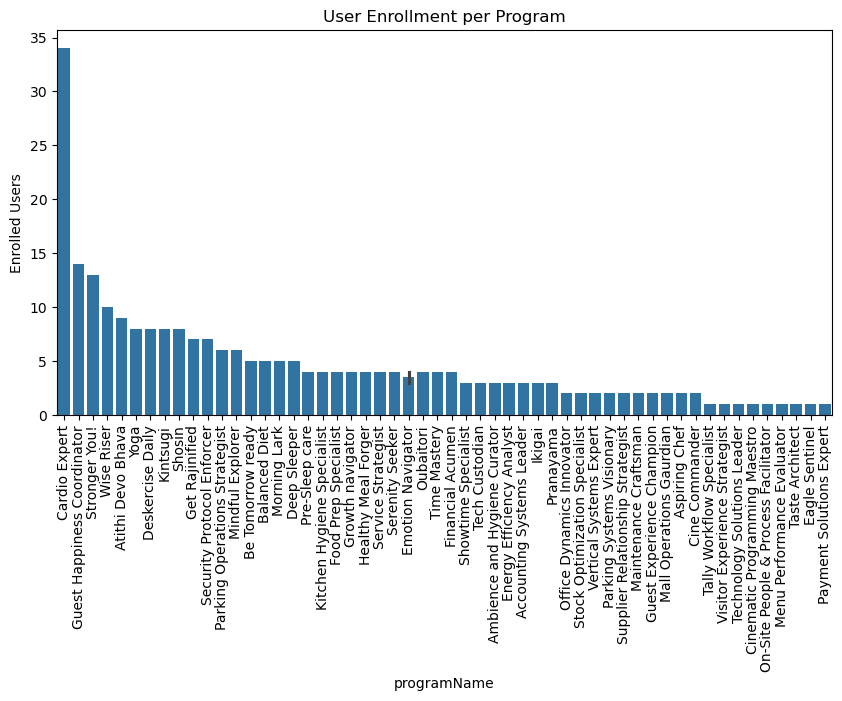

In [257]:
# 1. User Engagement per Program
plt.figure(figsize=(10,5))
sns.barplot(x='programName', y='Enrolled Users', data=program_summary)
plt.xticks(rotation=90)
plt.title("User Enrollment per Program")
plt.show()

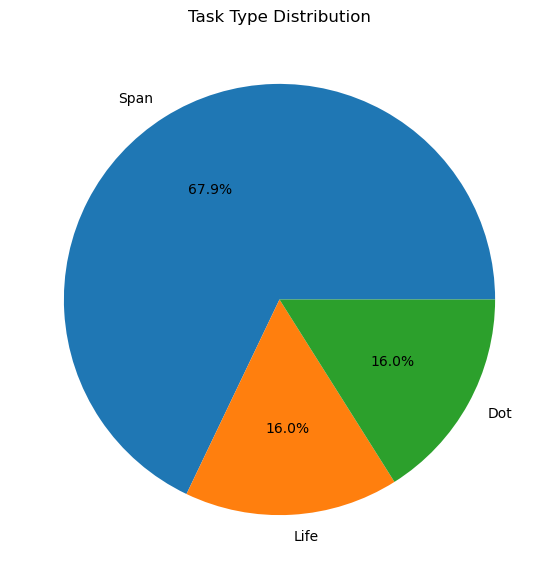

In [260]:
# 2. Task type Distribution
task_type_count = tasks["taskType"].value_counts()
task_type_count.plot(kind="pie", autopct='%1.1f%%', figsize=(7,7), title="Task Type Distribution")
plt.ylabel("")
plt.show()


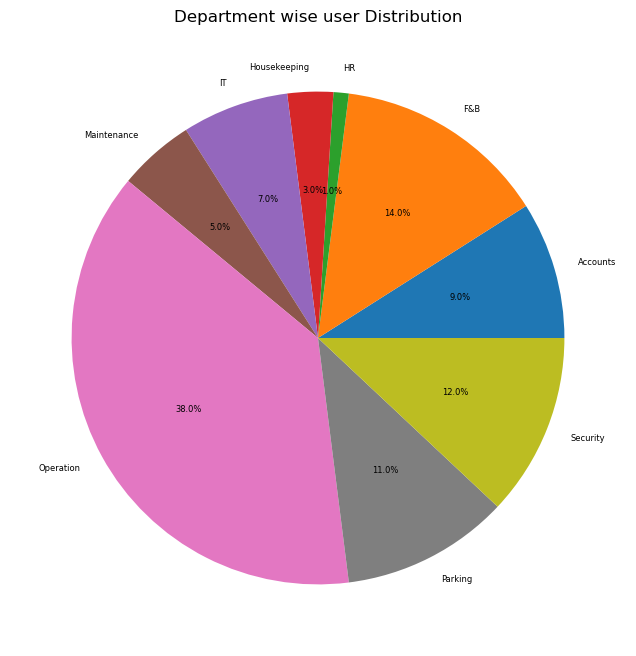

In [ ]:
# 3. Department wise user engagements
dept_user_engagement = users.groupby("department")["userId"].count()
dept_user_engagement.plot(kind="pie", autopct='%1.1f%%', figsize=(8,8),textprops={'fontsize': 6}, title="Department wise user Distribution")
plt.ylabel("")
plt.show()

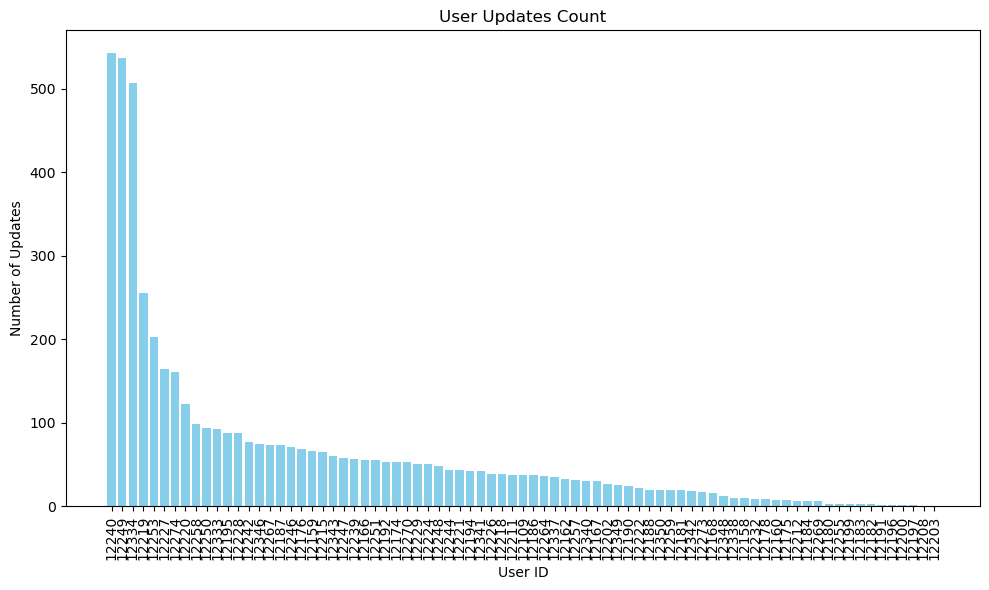

In [ ]:
# 4. User Updates Count
user_updates = updates.groupby('userId').size().reset_index(name="Number of Updates")
user_updates = user_updates.sort_values(by = "Number of Updates", ascending=False)
# Plot user updates 
plt.figure(figsize=(10, 6))
plt.bar(user_updates["userId"].astype(str), user_updates["Number of Updates"], color='skyblue')
plt.title('User Updates Count')
plt.xlabel('User ID')
plt.ylabel('Number of Updates')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

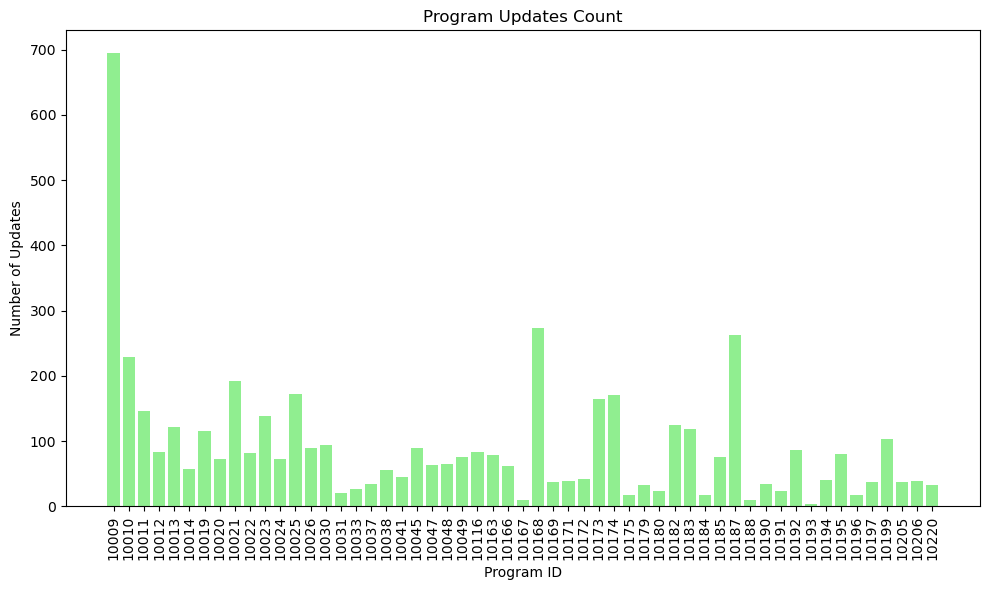

In [ ]:
# Calculate program updates
program_updates = updates.groupby('programId').size().reset_index(name="No of Updates")
progran_updates = program_updates.sort_values(by = "No of Updates", ascending=False)

# 5. Program updates counts
plt.figure(figsize=(10, 6))
plt.bar(program_updates["programId"].astype(str), program_updates["No of Updates"], color='lightgreen')
plt.title('Program Updates Count')
plt.xlabel('Program ID')
plt.ylabel('Number of Updates')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

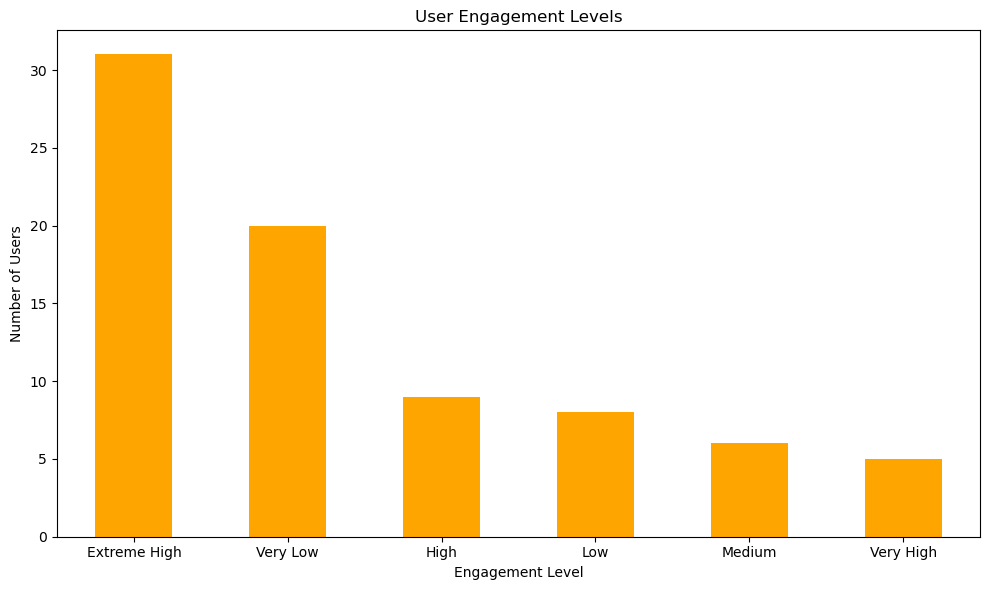

In [ ]:
# Calculate user engagement
user_engagement = updates.groupby('userId').size().reset_index(name='updates')
user_engagement['engagement_level'] = pd.cut(user_engagement['updates'], bins=[0, 10, 20, 30, 40, 50, float('inf')], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High','Extreme High'])

# 6. User engagement levels
plt.figure(figsize=(10, 6))
user_engagement['engagement_level'].value_counts().plot(kind='bar', color='orange')
plt.title('User Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

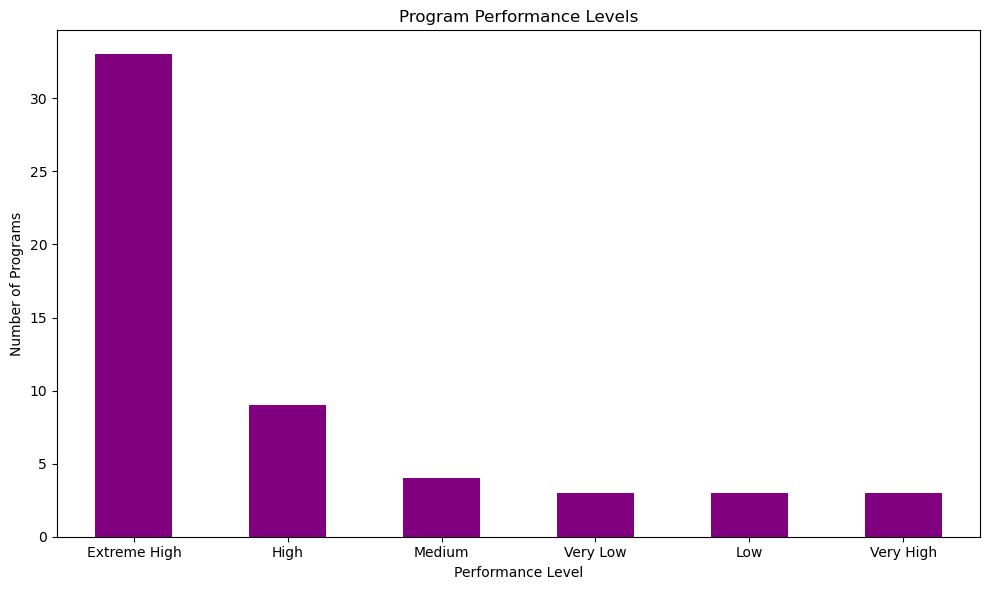

In [ ]:
# Calculate program performance
program_performance = updates.groupby('programId').size().reset_index(name='updates')
program_performance['performance_level'] = pd.cut(program_performance['updates'], bins=[0, 10, 20, 30, 40, 50, float("inf")], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High','Extreme High'])

# 7. Program performance levels
plt.figure(figsize=(10, 6))
program_performance['performance_level'].value_counts().plot(kind='bar', color='purple')
plt.title('Program Performance Levels')
plt.xlabel('Performance Level')
plt.ylabel('Number of Programs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [274]:
# Segment users based on engagement levels
user_segments = user_engagement.groupby('engagement_level').size().reset_index(name='count')
print("User Segments:\n", user_segments)

User Segments:
   engagement_level  count
0         Very Low     20
1              Low      8
2           Medium      6
3             High      9
4        Very High      5
5     Extreme High     31


C:\Users\user\AppData\Local\Temp\ipykernel_10988\3228848846.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_segments = user_engagement.groupby('engagement_level').size().reset_index(name='count')


In [275]:
# Identify programs that need improvement
programs_to_improve = program_performance[program_performance['performance_level'].isin(['Very Low', 'Low'])]
print("Programs to Improve:\n", programs_to_improve)

Programs to Improve:
     programId  updates performance_level
27      10167       10          Very Low
34      10175       18               Low
39      10184       17               Low
42      10188       10          Very Low
46      10193        4          Very Low
49      10196       18               Low


In [276]:
# Identify tasks with high impact but low completion rates
task_completion = df_merged.groupby('taskid').size().reset_index(name='updates')
task_completion['completion_level'] = pd.cut(task_completion['updates'], bins=[0, 10, 20, 30, 40, 50], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
tasks_to_prioritize = task_completion[task_completion['completion_level'].isin(['Very Low', 'Low'])]
print("Tasks to Prioritize:\n", tasks_to_prioritize)

Tasks to Prioritize:
      taskid  updates completion_level
179   10997       10         Very Low
180   10998       10         Very Low
181   10999       10         Very Low
182   11000       10         Very Low
183   11001       10         Very Low
184   11002       10         Very Low
222   11046       18              Low
223   11047       18              Low
224   11048       18              Low
225   11049       18              Low
226   11050       18              Low
227   11051       18              Low
252   11100       17              Low
253   11101       17              Low
254   11102       17              Low
255   11103       17              Low
256   11104       17              Low
269   11123       10         Very Low
270   11124       10         Very Low
271   11125       10         Very Low
272   11126       10         Very Low
273   11127       10         Very Low
274   11128       10         Very Low
293   11153        4         Very Low
294   11154        4        